In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car_data = pd.read_csv("datasets/raw-data/car_data.csv")

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data = car_data.drop(columns={"Car_Name"})

In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [ ]:
car_data["Owner"] = car_data["Owner"].astype("object")

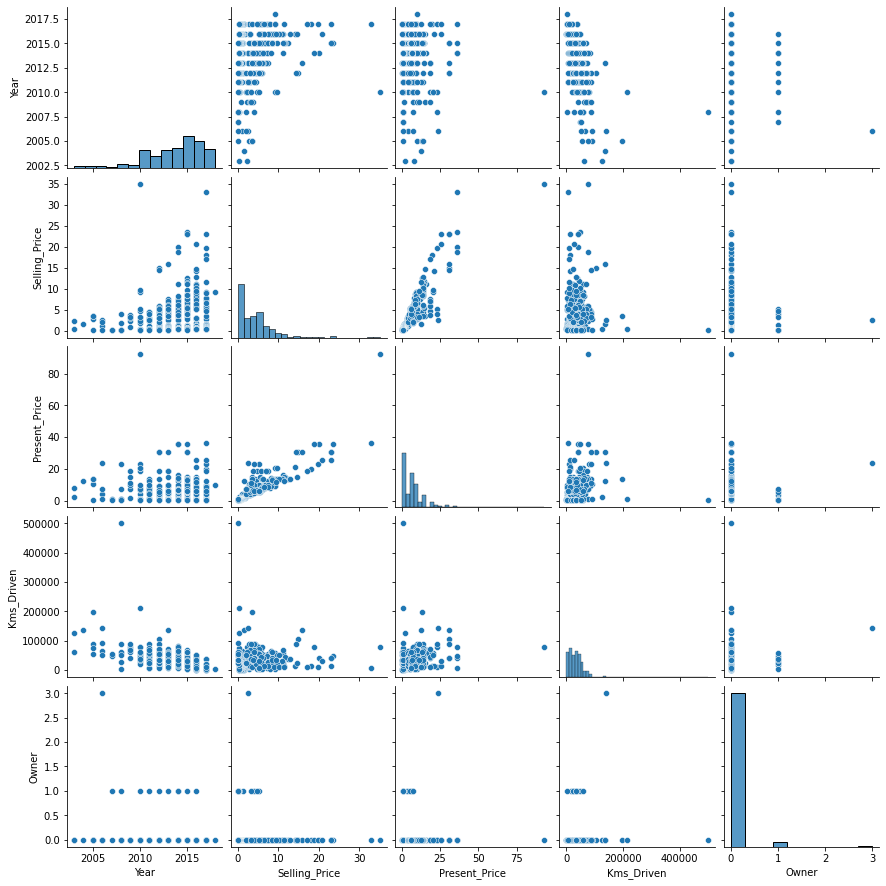

In [ ]:
sns.pairplot(car_data)

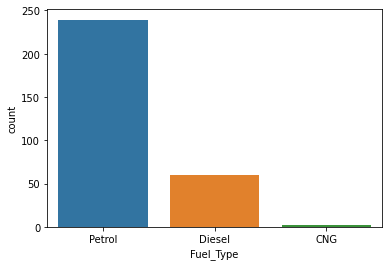

In [ ]:
sns.countplot(x = "Fuel_Type" , data = car_data)

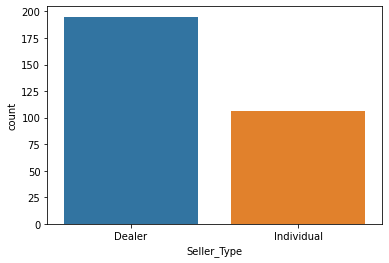

In [ ]:
sns.countplot(x = "Seller_Type" , data = car_data)

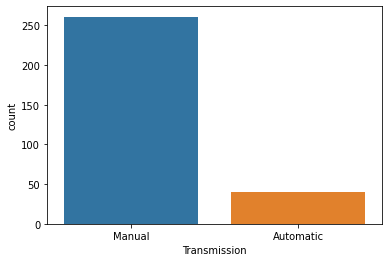

In [ ]:
sns.countplot(x = "Transmission" , data = car_data)

In [ ]:
def plot_barplot(data , figsize = (10 , 20) , wspace = 0.3 , hspace = 0.7):
  import seaborn as sns
  fig1 , axes = plt.subplots(len(data.describe().columns) , 1 , figsize = (10 , 20))
  plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
  axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
  for i , column in zip(range(len(data.describe().columns)) , data.describe().columns):
    try:
      sns.boxplot(data = data , x = column , ax = axes[i])
    except:
      fig1.delaxes(axes[i])
      continue

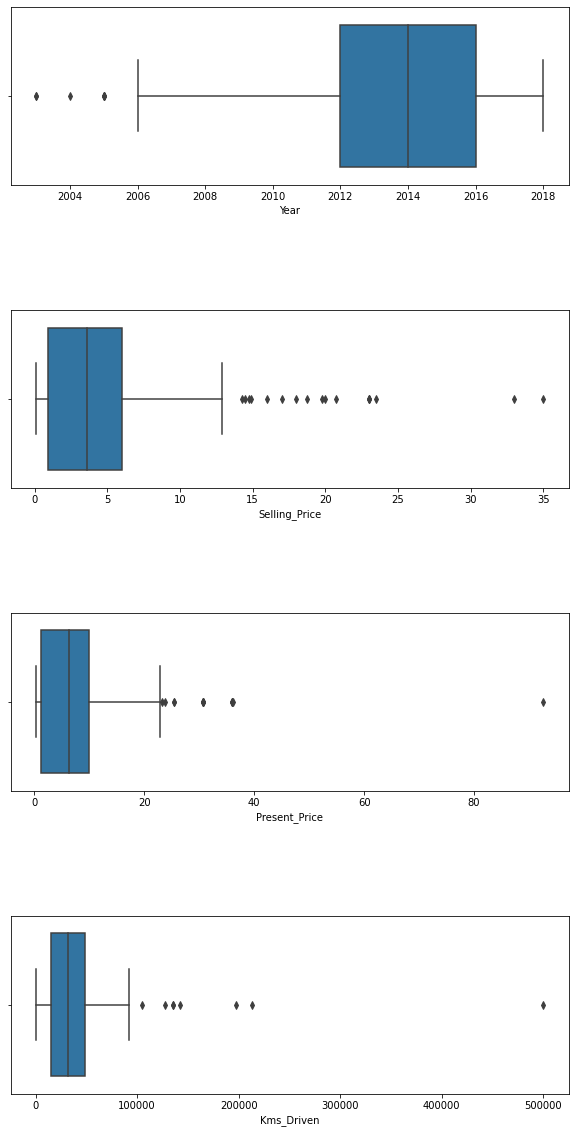

In [ ]:
plot_barplot(data = car_data)

In [ ]:
car_data.describe().columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven'], dtype='object')

In [ ]:
def outlier_detector(data):
  for i in data.describe().columns:
      col = list(pd.Series(data[i]))
      col.sort()
      quantile1 , quantile3 = np.percentile(col , [25 , 75])
      iqr = quantile3 - quantile1
      lowerbound_value = quantile1 - (1.5 * iqr)
      upperbound_value = quantile3 + (1.5 * iqr)
      print(i , " : Lowerbound Value=" ,  lowerbound_value , "| Upperbound Value=" ,  upperbound_value)

In [ ]:
outlier_detector(car_data)

Year  : Lowerbound Value= 2006.0 | Upperbound Value= 2022.0
Selling_Price  : Lowerbound Value= -6.749999999999999 | Upperbound Value= 13.649999999999999
Present_Price  : Lowerbound Value= -11.850000000000001 | Upperbound Value= 22.950000000000003
Kms_Driven  : Lowerbound Value= -35650.5 | Upperbound Value= 99417.5


In [ ]:
car_data = car_data.drop(car_data[(car_data["Year"] < 2006) | (car_data["Year"] > 2022)].index)
car_data = car_data.drop(car_data[(car_data["Selling_Price"] < 0) | (car_data["Selling_Price"] > 13.65)].index)
car_data = car_data.drop(car_data[(car_data["Present_Price"] < 0) | (car_data["Present_Price"] > 22.95)].index)
car_data = car_data.drop(car_data[(car_data["Kms_Driven"] < 0) | (car_data["Kms_Driven"] > 100000)].index)

In [ ]:
car_data.shape

(274, 8)

In [ ]:
# car_data.to_csv("/content/drive/MyDrive/Datasets/cleaned_car_data.csv")  